In [ ]:
#!pip install "statsmodels==0.11.1"

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
#from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, SimpleRNN
from keras.optimizers import Adam, RMSprop
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau,TensorBoard,ModelCheckpoint,EarlyStopping

In [ ]:
ped = pd.read_csv('/flinder_and_collin.csv')
ped

,Unnamed: 0,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount,CollinsPlaceNorth,class
0,0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000,4086.00,1711.00,actual
1,1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000,1952.00,2925.00,actual
2,2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000,1628.00,1306.00,actual
3,3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200,2063.00,1547.00,actual
4,4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000,2921.00,7781.00,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,3144.00,3144.00,predict
2431,2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,3146.44,3146.44,predict
2432,2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,3139.80,3139.80,predict
2433,2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,3840.88,3840.88,predict


In [ ]:
#ped.loc[2251:,['FlindersStSparkLaneCount','CollinsPlaceNorth']] = 0
ped

,Unnamed: 0,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount,CollinsPlaceNorth,class
0,0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000,4086.00,1711.00,actual
1,1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000,1952.00,2925.00,actual
2,2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000,1628.00,1306.00,actual
3,3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200,2063.00,1547.00,actual
4,4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000,2921.00,7781.00,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,3144.00,3144.00,predict
2431,2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,3146.44,3146.44,predict
2432,2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,3139.80,3139.80,predict
2433,2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,3840.88,3840.88,predict


In [ ]:
rainfall = pd.read_csv('/content/rainfall_with_prediction.csv')
new = rainfall.iloc[:,1].values
ped['Rainfall amount (millimetres)'] = new

In [ ]:
ped.drop('Unnamed: 0',axis = 1, inplace =True)

## Data Processing

In [ ]:
ped

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount,CollinsPlaceNorth,class
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000000,4086.00,1711.00,actual
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000000,1952.00,2925.00,actual
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000000,1628.00,1306.00,actual
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200000,2063.00,1547.00,actual
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000000,2921.00,7781.00,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,1.552990,3144.00,3144.00,predict
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.552994,3146.44,3146.44,predict
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,1.552996,3139.80,3139.80,predict
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,1.552988,3840.88,3840.88,predict


In [ ]:
bour = pd.read_csv('/content/Bourke_Street_Mall_South.csv')



In [ ]:
#ped[ped['class'] == 'actual']
ped.columns
ped_new = ped[['date_new','Public Holiday?','Min','Max','Daily global solar exposure (MJ/m*m)',
       'Rainfall amount (millimetres)', 'FlindersStSparkLaneCount',
       'CollinsPlaceNorth']]

In [ ]:
X = ped_new.iloc[:2251]
X_p = ped_new.iloc[2251:]

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


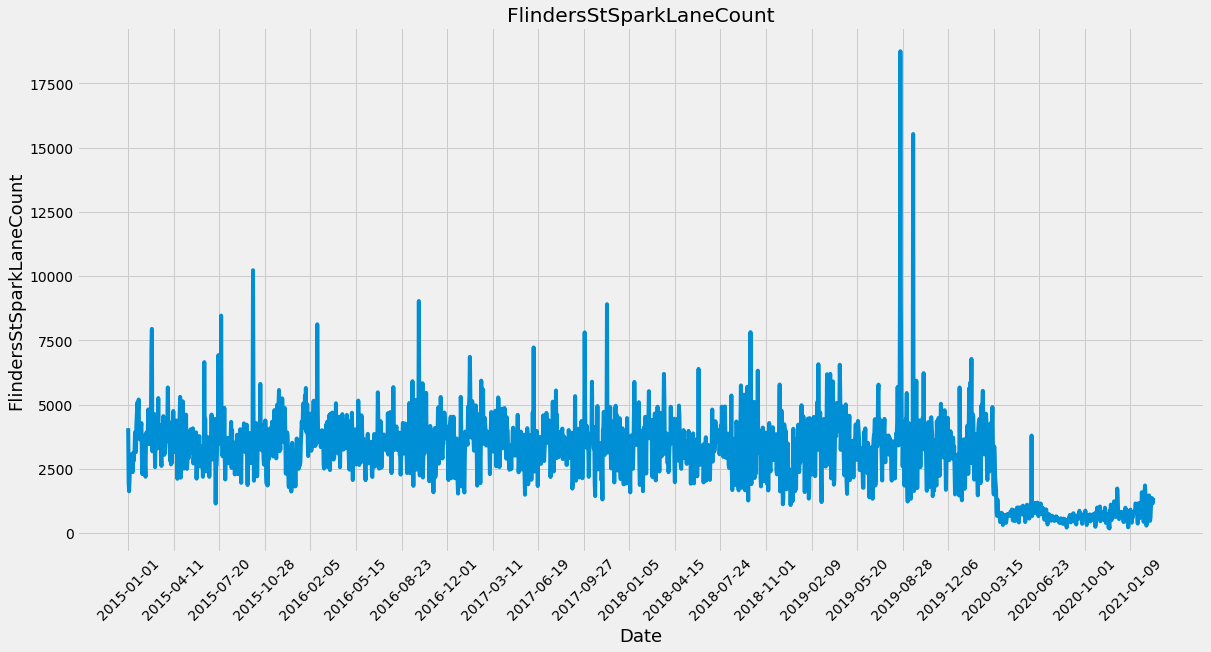

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(X.shape[0]),X['FlindersStSparkLaneCount'])
plt.xticks(range(0,X.shape[0],100),X['date_new'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('FlindersStSparkLaneCount',fontsize=18)
plt.title('FlindersStSparkLaneCount')
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) 


In [ ]:
X_norm = X.copy()
X_norm = X_norm.iloc[:,1:-1]

,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount
0,1,13.3,26.9,23.6,0.0,4086.0
1,0,15.4,38.8,26.8,0.0,1952.0
2,0,20.0,38.2,26.5,0.0,1628.0
3,0,16.3,21.4,25.2,4.2,2063.0
4,0,15.0,22.0,30.7,0.0,2921.0
...,...,...,...,...,...,...
2246,0,13.0,20.2,23.3,0.0,1258.0
2247,0,11.3,24.3,18.9,0.0,1366.0
2248,0,13.3,19.7,15.7,0.4,1338.0
2249,0,11.3,18.6,11.8,0.0,1163.0


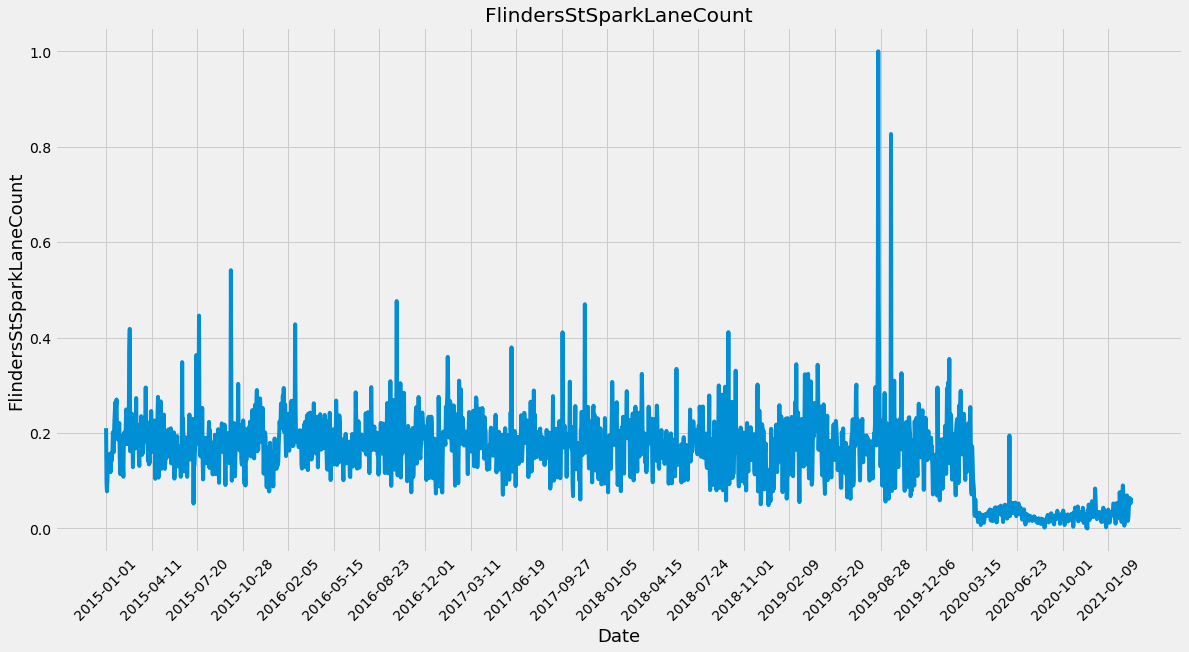

In [ ]:
X_norm = X.copy()

X_norm.iloc[:,1:] = scaler.fit_transform(X_norm.iloc[:,1:])

plt.figure(figsize = (18,9))
plt.plot(range(X_norm.shape[0]),X_norm['FlindersStSparkLaneCount'])
plt.xticks(range(0,X_norm.shape[0],100),X_norm['date_new'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('FlindersStSparkLaneCount',fontsize=18)
plt.title('FlindersStSparkLaneCount')
plt.show()

In [ ]:
X

,date_new,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount,CollinsPlaceNorth
0,2015-01-01,1,13.3,26.9,23.6,0.0,4086.0,1711.0
1,2015-01-02,0,15.4,38.8,26.8,0.0,1952.0,2925.0
2,2015-01-03,0,20.0,38.2,26.5,0.0,1628.0,1306.0
3,2015-01-04,0,16.3,21.4,25.2,4.2,2063.0,1547.0
4,2015-01-05,0,15.0,22.0,30.7,0.0,2921.0,7781.0
...,...,...,...,...,...,...,...,...
2246,2021-02-24,0,13.0,20.2,23.3,0.0,1258.0,4151.0
2247,2021-02-25,0,11.3,24.3,18.9,0.0,1366.0,4237.0
2248,2021-02-26,0,13.3,19.7,15.7,0.4,1338.0,3850.0
2249,2021-02-27,0,11.3,18.6,11.8,0.0,1163.0,1732.0


In [ ]:
from pickle import dump
X_norm = X.iloc[1:,1:-1].copy()

scaler = MinMaxScaler() 
X_norm.iloc[:,:] = scaler.fit_transform(X_norm.iloc[:,:].values)
dump(scaler, open('scaler_Flinder.pkl', 'wb'))

X_norm

,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount
1,0.0,0.540146,0.863768,0.804805,0.000000,0.095261
2,0.0,0.708029,0.846377,0.795796,0.000000,0.077814
3,0.0,0.572993,0.359420,0.756757,0.076923,0.101239
4,0.0,0.525547,0.376812,0.921922,0.000000,0.147442
5,0.0,0.624088,0.492754,0.948949,0.000000,0.155035
...,...,...,...,...,...,...
2246,0.0,0.452555,0.324638,0.699700,0.000000,0.057889
2247,0.0,0.390511,0.443478,0.567568,0.000000,0.063705
2248,0.0,0.463504,0.310145,0.471471,0.007326,0.062197
2249,0.0,0.390511,0.278261,0.354354,0.000000,0.052773


In [ ]:
n_past = 200           
n_future = 184       


x_train = [] #features
y_train = []

for i in range(n_past, len(X_norm) -n_future +1):
	x_train.append(X_norm.iloc[i-n_past:i, :]) # use all column apart from date as feature
	y_train.append(X_norm.iloc[i:i+n_future,-1]) # considering last column as target label

x_train, y_train = np.array(x_train), np.array(y_train)
print('Train data shape: ', x_train.shape)
print('Train Target shape: ', y_train.shape)




Train data shape:  (1867, 200, 6)
Train Target shape:  (1867, 184)


In [ ]:
np.random.seed(36)
model = Sequential()
model.add(SimpleRNN(50,input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam', loss ='mse')
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 50)                2850      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               13056     
_________________________________________________________________
dense_22 (Dense)             (None, 184)               47288     
Total params: 63,194
Trainable params: 63,194
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs =100, batch_size=16,validation_split=.2,verbose=1)

Epoch 1/100
94/94 [==============================] - 3s 28ms/step - loss: 0.0026 - val_loss: 0.0178
Epoch 2/100
94/94 [==============================] - 3s 27ms/step - loss: 0.0026 - val_loss: 0.0170
Epoch 3/100
94/94 [==============================] - 3s 27ms/step - loss: 0.0026 - val_loss: 0.0172
Epoch 4/100
94/94 [==============================] - 2s 27ms/step - loss: 0.0026 - val_loss: 0.0174
Epoch 5/100
94/94 [==============================] - 3s 27ms/step - loss: 0.0026 - val_loss: 0.0171
Epoch 6/100
94/94 [==============================] - 2s 26ms/step - loss: 0.0026 - val_loss: 0.0172
Epoch 7/100
94/94 [==============================] - 2s 27ms/step - loss: 0.0026 - val_loss: 0.0171
Epoch 8/100
94/94 [==============================] - 3s 27ms/step - loss: 0.0026 - val_loss: 0.0170
Epoch 9/100
94/94 [==============================] - 3s 27ms/step - loss: 0.0026 - val_loss: 0.0166
Epoch 10/100
94/94 [==============================] - 3s 27ms/step - loss: 0.0026 - val_loss: 0.0176

In [ ]:
model.save("Flinder_model.h5")

In [ ]:

# predict next n days
to_pred = np.expand_dims(x_train[-1],axis=0)
prediction = model.predict(to_pred)


# Denormalize the scaled values
n_pred_scaled = X_norm.iloc[-1:,:]
# repeat the dataframe n times to align with n days prediction
n_pred_scaled = n_pred_scaled.loc[n_pred_scaled.index.repeat(n_future)].reset_index(drop=True)
n_pred_scaled['target'] = prediction[0]
n_pred_scaled.drop(columns=['FlindersStSparkLaneCount'],axis =1,inplace =True)

ValueError: ignored

In [ ]:
scaler.inverse_transform(n_pred_scaled)[:,-1]

array([2263.26454434, 2155.59407759, 2398.36337368, 2550.94115514,
       2481.71837832, 2806.84235591, 3195.55658537, 2975.68804818,
       2876.85446101, 3371.18593517, 3253.28837487, 3012.80847672,
       3155.48112202, 3447.36739147, 3366.38189363, 2923.94712898,
       3904.22424245, 3935.3103565 , 3776.87687981, 3878.98455369,
       4087.26981926, 3732.61361825, 3475.57788777, 3826.93509775,
       3668.74097916, 3649.61695898, 4100.82246843, 4045.29360357,
       3658.04568458, 3372.07667935, 3707.52888966, 3771.28032777,
       3545.70261571, 3762.53808457, 3959.89035773, 3339.70135215,
       3277.53521177, 3806.2213524 , 3650.33420312, 3598.66938043,
       3644.08875543, 3691.09453502, 3252.44135159, 3255.6506871 ,
       3472.91423339, 3349.84985876, 3290.12461755, 3720.43845418,
       3804.80236012, 3490.64582589, 3443.47263399, 3853.25618702,
       3820.39135176, 3655.38590419, 4034.27704337, 3938.41288018,
       3415.63846949, 3118.3476879 , 3553.48438266, 3844.11851

In [ ]:
ped.loc[2251:,'FlindersStSparkLaneCount'] =scaler.inverse_transform(n_pred_scaled)[:,-1]

In [ ]:
flinder = ped.copy()

# Flinder Street 

In [ ]:
#flinder.drop('CollinsPlaceNorth',axis =1, inplace =True)
flinder_df = flinder.iloc[:,[0,4,5,6,7,8,9,10]]
flinder_df.to_csv('flinder_prediction.csv', index =False)

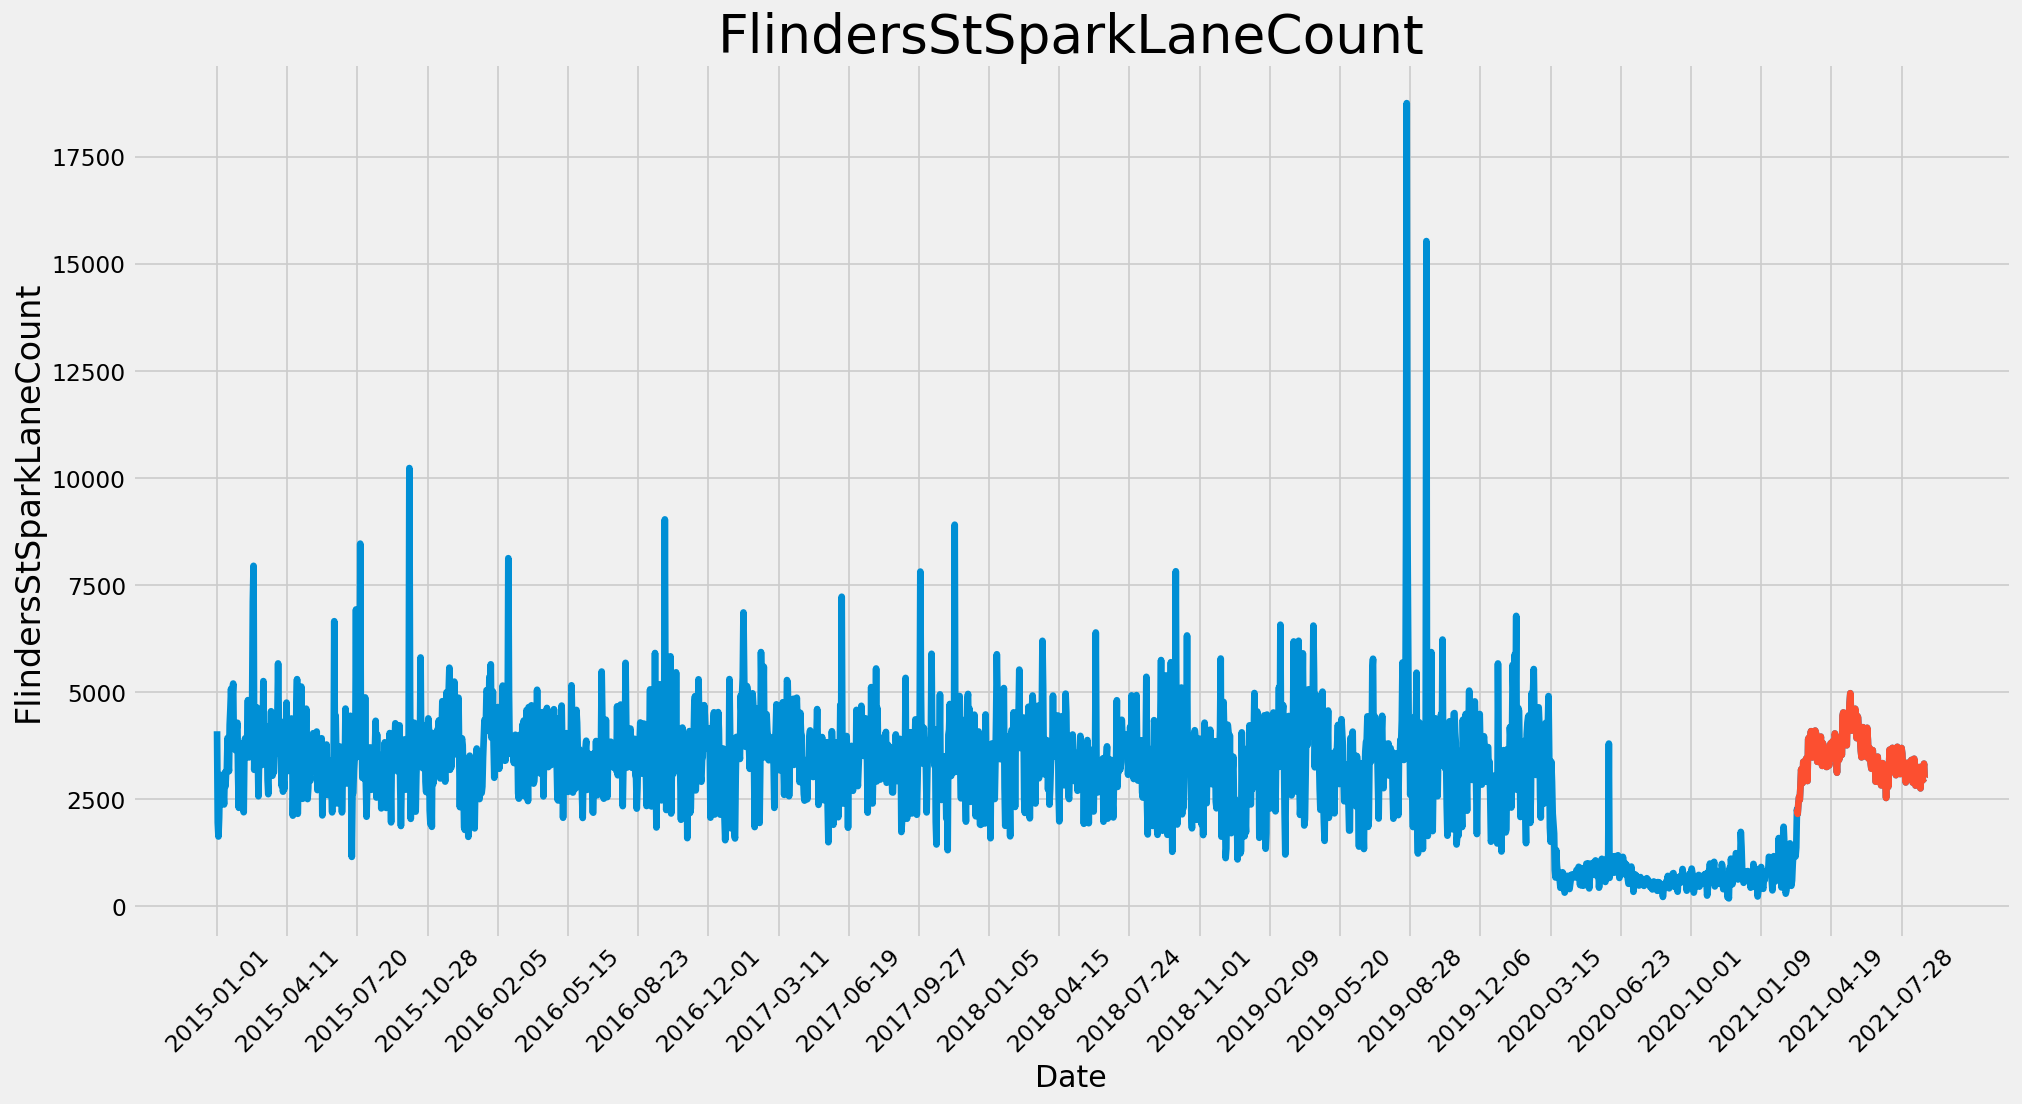

In [ ]:
plt.figure(figsize = (18,9),dpi =120)

plt.plot(list(range(2435)),flinder['FlindersStSparkLaneCount'])
plt.plot(list(range(2251,2435)),flinder['FlindersStSparkLaneCount'][2251:]);

plt.xticks(range(0,2435,100),flinder['date_new'].loc[:2435:100],rotation=45);
plt.xlabel('Date',fontsize=18)
plt.ylabel('FlindersStSparkLaneCount',fontsize=20)
plt.title('FlindersStSparkLaneCount',fontsize =32)
plt.show()


In [ ]:
ped

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount,CollinsPlaceNorth,class
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000000,4086.000000,1711.00,actual
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000000,1952.000000,2925.00,actual
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000000,1628.000000,1306.00,actual
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200000,2063.000000,1547.00,actual
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000000,2921.000000,7781.00,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,1.552990,2937.401268,3144.00,predict
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.552994,3195.260778,3146.44,predict
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,1.552996,3328.897585,3139.80,predict
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,1.552988,2986.774894,3840.88,predict


# Collin 

In [ ]:
col = X.iloc[1:,[1,2,3,4,5,7]].copy()

from pickle import dump
col = col.iloc[1:,].copy()

scaler = MinMaxScaler() 
col.iloc[:,:] = scaler.fit_transform(col.iloc[:,:].values)
dump(scaler, open('scaler_collin.pkl', 'wb'))

col

,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),CollinsPlaceNorth
2,0.0,0.708029,0.846377,0.795796,0.000000,0.064573
3,0.0,0.572993,0.359420,0.756757,0.076923,0.077488
4,0.0,0.525547,0.376812,0.921922,0.000000,0.411554
5,0.0,0.624088,0.492754,0.948949,0.000000,0.417502
6,0.0,0.667883,0.823188,0.621622,0.000000,0.390547
...,...,...,...,...,...,...
2246,0.0,0.452555,0.324638,0.699700,0.000000,0.217030
2247,0.0,0.390511,0.443478,0.567568,0.000000,0.221639
2248,0.0,0.463504,0.310145,0.471471,0.007326,0.200900
2249,0.0,0.390511,0.278261,0.354354,0.000000,0.087402


In [ ]:
n_past = 200           
n_future = 184       


x_train = [] #features
y_train = []

for i in range(n_past, len(col) -n_future +1):
	x_train.append(col.iloc[i-n_past:i, :]) # use all column apart from date as feature
	y_train.append(col.iloc[i:i+n_future,-1]) # considering last column as target label

x_train, y_train = np.array(x_train), np.array(y_train)
print('Train data shape: ', x_train.shape)
print('Train Target shape: ', y_train.shape)

Train data shape:  (1866, 200, 6)
Train Target shape:  (1866, 184)


In [ ]:
np.random.seed(36)
model = Sequential()
model.add(SimpleRNN(50,input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam', loss ='mse')
model.summary()
history = model.fit(x_train, y_train, epochs =100, batch_size=16,validation_split=.2,verbose=1)
# predict next n days
to_pred = np.expand_dims(x_train[-1],axis=0)
prediction = model.predict(to_pred)




Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 50)                2850      
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               13056     
_________________________________________________________________
dense_24 (Dense)             (None, 184)               47288     
Total params: 63,194
Trainable params: 63,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
94/94 [==============================] - 4s 34ms/step - loss: 0.1067 - val_loss: 0.0840
Epoch 2/100
94/94 [==============================] - 3s 32ms/step - loss: 0.0239 - val_loss: 0.0760
Epoch 3/100
94/94 [============================

KeyError: ignored

In [ ]:
model.save('Collin_model.h5')

In [ ]:
# Denormalize the scaled values
n_pred_scaled = col.iloc[-1:,:]
# repeat the dataframe n times to align with n days prediction
n_pred_scaled = n_pred_scaled.loc[n_pred_scaled.index.repeat(n_future)].reset_index(drop=True)
n_pred_scaled['target'] = prediction[0]
n_pred_scaled.drop(columns=['CollinsPlaceNorth'],axis =1,inplace =True)
ped.loc[2251:,'CollinsPlaceNorth'] =scaler.inverse_transform(n_pred_scaled)[:,-1]
ped

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount,CollinsPlaceNorth,class
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000000,4086.000000,1711.000000,actual
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000000,1952.000000,2925.000000,actual
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000000,1628.000000,1306.000000,actual
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200000,2063.000000,1547.000000,actual
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000000,2921.000000,7781.000000,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,1.552990,2937.401268,10232.117446,predict
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.552994,3195.260778,10946.777717,predict
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,1.552996,3328.897585,10047.677686,predict
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,1.552988,2986.774894,3379.579921,predict


In [ ]:
 col_df= ped.iloc[:,[0,5,6,7,8,9,11]]

In [ ]:
col_df.to_csv('collin_and_prediciton.csv', index = False)

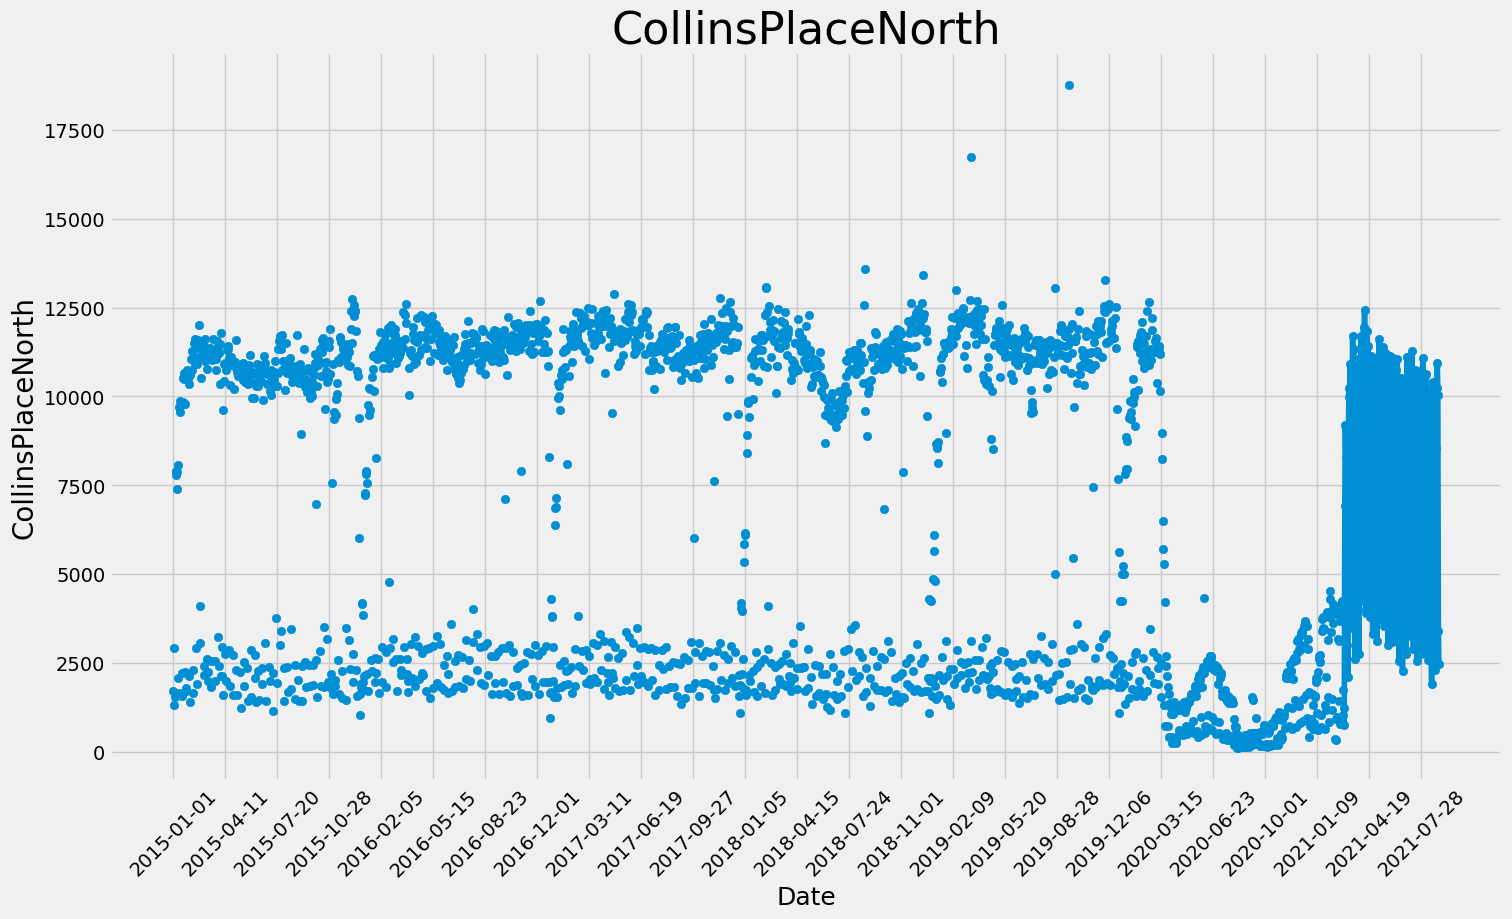

In [ ]:
plt.figure(figsize = (16,9),dpi =100)

plt.scatter(list(range(2435)),col_df['CollinsPlaceNorth'])
plt.plot(list(range(2251,2435)),col_df['CollinsPlaceNorth'][2251:]);

plt.xticks(range(0,2435,100),col_df['date_new'].loc[:2435:100],rotation=45);
plt.xlabel('Date',fontsize=18)
plt.ylabel('CollinsPlaceNorth',fontsize=20)
plt.title('CollinsPlaceNorth',fontsize =32)
plt.show()


# Southern 

In [ ]:
s_v_df = pd.read_csv('/content/Southern_VIC_dataset.csv')

In [ ]:
s = s_v_df.iloc[:2250,2:-1]
s

,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount
0,13.3,26.9,23.6,0.0,2592.0
1,15.4,38.8,26.8,0.0,1848.0
2,20.0,38.2,26.5,0.0,1451.0
3,16.3,21.4,25.2,4.2,1047.0
4,15.0,22.0,30.7,0.0,3416.0
...,...,...,...,...,...
2245,13.1,19.2,22.1,0.0,1003.0
2246,13.0,20.2,23.3,0.0,1056.0
2247,11.3,24.3,18.9,0.0,1185.0
2248,13.3,19.7,15.7,0.4,1194.0


In [ ]:
 n_future = len(s_v_df.iloc[2250:,1:])

In [ ]:
from pickle import dump
s = s.iloc[:].copy()

scaler = MinMaxScaler() 
s.iloc[:,:] = scaler.fit_transform(s.iloc[:,:].values)
dump(scaler, open('sotuhern.pkl', 'wb'))

s

,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount
0,0.463504,0.518841,0.708709,0.000000,0.289714
1,0.540146,0.863768,0.804805,0.000000,0.195465
2,0.708029,0.846377,0.795796,0.000000,0.145174
3,0.572993,0.359420,0.756757,0.076923,0.093995
4,0.525547,0.376812,0.921922,0.000000,0.394097
...,...,...,...,...,...
2245,0.456204,0.295652,0.663664,0.000000,0.088422
2246,0.452555,0.324638,0.699700,0.000000,0.095136
2247,0.390511,0.443478,0.567568,0.000000,0.111477
2248,0.463504,0.310145,0.471471,0.007326,0.112617


In [ ]:
n_past = 200           
n_future = 184       


x_train = [] #features
y_train = []

for i in range(n_past, len(s) -n_future +1):
	x_train.append(s.iloc[i-n_past:i, :]) # use all column apart from date as feature
	y_train.append(s.iloc[i:i+n_future,-1]) # considering last column as target label

x_train, y_train = np.array(x_train), np.array(y_train)
print('Train data shape: ', x_train.shape)
print('Train Target shape: ', y_train.shape)

Train data shape:  (1867, 200, 5)
Train Target shape:  (1867, 184)


In [ ]:
np.random.seed(36)
model = Sequential()
model.add(SimpleRNN(50,input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam', loss ='mse')

history = model.fit(x_train, y_train, epochs =100, batch_size=16,validation_split=.2,verbose=1)
# predict next n days
to_pred = np.expand_dims(x_train[-1],axis=0)
prediction = model.predict(to_pred)

Epoch 1/100
94/94 [==============================] - 4s 32ms/step - loss: 0.1490 - val_loss: 0.1096
Epoch 2/100
94/94 [==============================] - 2s 26ms/step - loss: 0.0310 - val_loss: 0.1174
Epoch 3/100
94/94 [==============================] - 2s 26ms/step - loss: 0.0248 - val_loss: 0.1285
Epoch 4/100
94/94 [==============================] - 3s 27ms/step - loss: 0.0230 - val_loss: 0.1330
Epoch 5/100
94/94 [==============================] - 3s 27ms/step - loss: 0.0207 - val_loss: 0.1547
Epoch 6/100
94/94 [==============================] - 2s 27ms/step - loss: 0.0195 - val_loss: 0.1622
Epoch 7/100
94/94 [==============================] - 2s 26ms/step - loss: 0.0187 - val_loss: 0.1782
Epoch 8/100
94/94 [==============================] - 3s 27ms/step - loss: 0.0177 - val_loss: 0.1813
Epoch 9/100
94/94 [==============================] - 2s 26ms/step - loss: 0.0174 - val_loss: 0.1818
Epoch 10/100
94/94 [==============================] - 2s 26ms/step - loss: 0.0172 - val_loss: 0.1862

In [ ]:
model.save('southern.h5')

In [ ]:
# Denormalize the scaled values
n_pred_scaled = s.iloc[-1:,:]
# repeat the dataframe n times to align with n days prediction
n_pred_scaled = n_pred_scaled.loc[n_pred_scaled.index.repeat(n_future)].reset_index(drop=True)
n_pred_scaled['target'] = prediction[0]
n_pred_scaled.drop(columns=['SouthernCrossCount'], axis =1 ,inplace = True)

#ped.loc[2251:,] =scaler.inverse_transform(n_pred_scaled)[:,-1]
s_v_df.loc[2251:,'SouthernCrossCount'] = scaler.inverse_transform(n_pred_scaled)[:,-1]
s_v_df

,Unnamed: 0,date_new,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount
0,0,2015-01-01,13.3,26.9,23.600000,0.000,2592.000000,2813.0
1,1,2015-01-02,15.4,38.8,26.800000,0.000,1848.000000,4648.0
2,2,2015-01-03,20.0,38.2,26.500000,0.000,1451.000000,1428.0
3,3,2015-01-04,16.3,21.4,25.200000,4.200,1047.000000,1347.0
4,4,2015-01-05,15.0,22.0,30.700000,0.000,3416.000000,11483.0
...,...,...,...,...,...,...,...,...
2430,2430,2021-08-27,6.1,14.5,12.161574,3.488,4878.747864,NaN
2431,2431,2021-08-28,8.8,20.7,12.163382,1.768,4724.838254,NaN
2432,2432,2021-08-29,8.5,17.6,12.165101,2.032,4981.552516,NaN
2433,2433,2021-08-30,9.2,19.3,12.166721,0.320,5193.616400,NaN


In [ ]:
southern = s_v_df.iloc[:,[1,2,3,4,5,6]]
southern.to_csv('southern_and_prediction.csv', index = False)

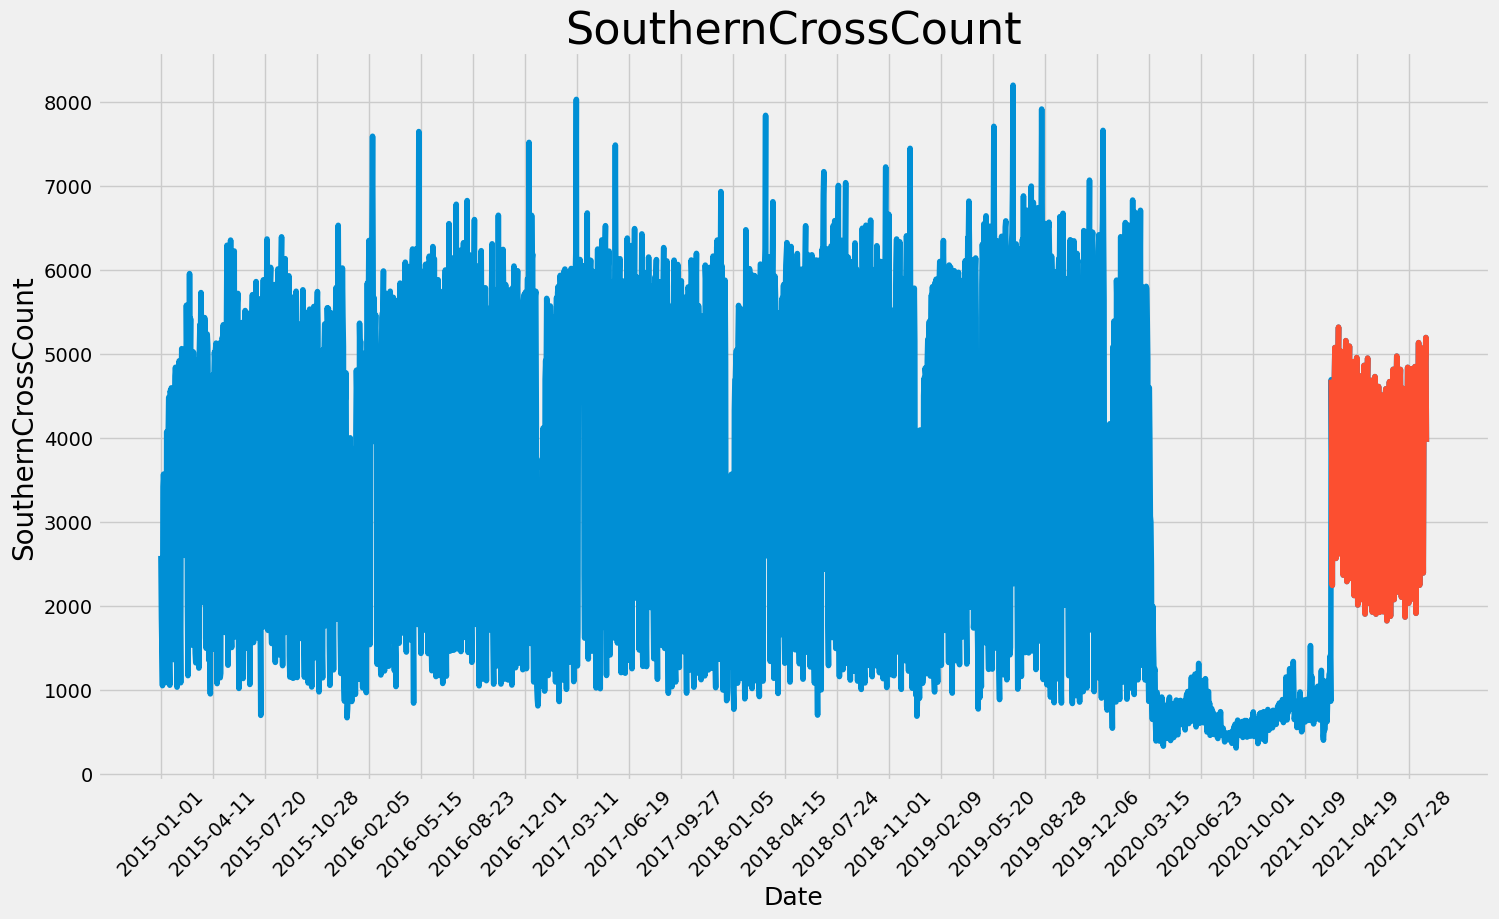

In [ ]:
plt.figure(figsize = (16,9),dpi =100)

plt.plot(list(range(2435)),southern['SouthernCrossCount'])
plt.plot(list(range(2251,2435)),southern['SouthernCrossCount'][2251:]);

plt.xticks(range(0,2435,100),southern['date_new'].loc[:2435:100],rotation=45);
plt.xlabel('Date',fontsize=18)
plt.ylabel('SouthernCrossCount',fontsize=20)
plt.title('SouthernCrossCount',fontsize =32)
plt.show()

# Bourke street

In [2]:
b_df = pd.read_csv('/content/IndDepVarUpdate.csv')
b_df

,Day Index,date,Public Holiday?,Year,Month,Day,Day of the Year,Day of the Week,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,FlindersStSparkLaneCount,CollinsPlaceNorth,BourkeStMallSouth
0,0,1/1/15,1,2015,1,1,1,Thursday,5,13.3,26.9,23.600000,0.000,2592.0,2813.0,4086.0,1711.0,21217.0
1,1,2/1/15,0,2015,1,2,2,Friday,6,15.4,38.8,26.800000,0.000,1848.0,4648.0,1952.0,2925.0,25256.0
2,2,3/1/15,0,2015,1,3,3,Saturday,7,20.0,38.2,26.500000,0.000,1451.0,1428.0,1628.0,1306.0,17648.0
3,3,4/1/15,0,2015,1,4,4,Sunday,1,16.3,21.4,25.200000,4.200,1047.0,1347.0,2063.0,1547.0,24428.0
4,4,5/1/15,0,2015,1,5,5,Monday,2,15.0,22.0,30.700000,0.000,3416.0,11483.0,2921.0,7781.0,28503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,27/8/21,0,2021,8,27,239,Friday,6,6.1,14.5,12.161574,3.488,NaN,NaN,NaN,NaN,NaN
2431,2431,28/8/21,0,2021,8,28,240,Saturday,7,8.8,20.7,12.163382,1.768,NaN,NaN,NaN,NaN,NaN
2432,2432,29/8/21,0,2021,8,29,241,Sunday,1,8.5,17.6,12.165101,2.032,NaN,NaN,NaN,NaN,NaN
2433,2433,30/8/21,0,2021,8,30,242,Monday,2,9.2,19.3,12.166721,0.320,NaN,NaN,NaN,NaN,NaN


In [30]:
bour_df = b_df.iloc[:2251,[2,8,9,10,11,12,17]]
bour_df['BourkeStMallSouth'].fillna(bour_df['BourkeStMallSouth'].mean(),inplace=True)
bour_df.isnull().sum()

Public Holiday?                         0
DayOfWeekNumeric                        0
Min                                     0
Max                                     0
Daily global solar exposure (MJ/m*m)    0
Rainfall amount (millimetres)           0
BourkeStMallSouth                       0
dtype: int64

In [31]:
len(bour_df.iloc[2252:])


0

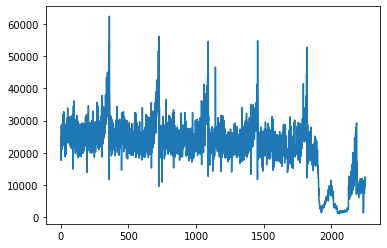

In [23]:
plt.plot(range(2251), bour_df['BourkeStMallSouth'][:2251])

In [32]:
from pickle import dump
from sklearn.preprocessing import MinMaxScaler
b = bour_df.iloc[:].copy()

scaler = MinMaxScaler() 
b.iloc[:,:] = scaler.fit_transform(b.iloc[:,:].values)
dump(scaler, open('bourk.pkl', 'wb'))

b

,Public Holiday?,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,1.0,0.666667,0.463504,0.518841,0.708709,0.000000,0.329164
1,0.0,0.833333,0.540146,0.863768,0.804805,0.000000,0.395026
2,0.0,1.000000,0.708029,0.846377,0.795796,0.000000,0.270966
3,0.0,0.000000,0.572993,0.359420,0.756757,0.076923,0.381525
4,0.0,0.166667,0.525547,0.376812,0.921922,0.000000,0.447974
...,...,...,...,...,...,...,...
2246,0.0,0.500000,0.452555,0.324638,0.699700,0.000000,0.121500
2247,0.0,0.666667,0.390511,0.443478,0.567568,0.000000,0.128023
2248,0.0,0.833333,0.463504,0.310145,0.471471,0.007326,0.147460
2249,0.0,1.000000,0.390511,0.278261,0.354354,0.000000,0.186645


In [33]:
n_past = 200           
n_future = 184       


x_train = [] #features
y_train = []

for i in range(n_past, len(b) -n_future +1):
	x_train.append(b.iloc[i-n_past:i, :]) # use all column apart from date as feature
	y_train.append(b.iloc[i:i+n_future,-1]) # considering last column as target label

x_train, y_train = np.array(x_train), np.array(y_train)
print('Train data shape: ', x_train.shape)
print('Train Target shape: ', y_train.shape)


np.random.seed(36)
model = Sequential()
model.add(SimpleRNN(50,input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(256))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam', loss ='mse')

history = model.fit(x_train, y_train, epochs =100, batch_size=16,validation_split=.2,verbose=1)
# predict next n days
to_pred = np.expand_dims(x_train[-1],axis=0)
prediction = model.predict(to_pred)

Train data shape:  (1868, 200, 7)
Train Target shape:  (1868, 184)
Epoch 1/100
94/94 [==============================] - 3s 26ms/step - loss: 0.0592 - val_loss: 0.0528
Epoch 2/100
94/94 [==============================] - 2s 24ms/step - loss: 0.0105 - val_loss: 0.0536
Epoch 3/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0082 - val_loss: 0.0581
Epoch 4/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0071 - val_loss: 0.0640
Epoch 5/100
94/94 [==============================] - 2s 24ms/step - loss: 0.0066 - val_loss: 0.0604
Epoch 6/100
94/94 [==============================] - 2s 23ms/step - loss: 0.0060 - val_loss: 0.0584
Epoch 7/100
94/94 [==============================] - 2s 22ms/step - loss: 0.0058 - val_loss: 0.0553
Epoch 8/100
94/94 [==============================] - 2s 22ms/step - loss: 0.0055 - val_loss: 0.0666
Epoch 9/100
94/94 [==============================] - 2s 21ms/step - loss: 0.0053 - val_loss: 0.0669
Epoch 10/100
94/94 [=============

In [34]:
model.save('bourk.h5')

In [39]:
# Denormalize the scaled values
n_pred_scaled = b.iloc[-1:,:]
# repeat the dataframe n times to align with n days prediction
n_pred_scaled = n_pred_scaled.loc[n_pred_scaled.index.repeat(n_future)].reset_index(drop=True)
n_pred_scaled['target'] = prediction[0]
n_pred_scaled.drop(columns=['BourkeStMallSouth'], axis =1 ,inplace = True)

#ped.loc[2251:,] =scaler.inverse_transform(n_pred_scaled)[:,-1]
b_df.loc[2251:,'BourkeStMallSouth'] = scaler.inverse_transform(n_pred_scaled)[:,-1]
#s_v_df

b_df

,Day Index,date,Public Holiday?,Year,Month,Day,Day of the Year,Day of the Week,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,FlindersStSparkLaneCount,CollinsPlaceNorth,BourkeStMallSouth
0,0,1/1/15,1,2015,1,1,1,Thursday,5,13.3,26.9,23.600000,0.000,2592.0,2813.0,4086.0,1711.0,21217.000000
1,1,2/1/15,0,2015,1,2,2,Friday,6,15.4,38.8,26.800000,0.000,1848.0,4648.0,1952.0,2925.0,25256.000000
2,2,3/1/15,0,2015,1,3,3,Saturday,7,20.0,38.2,26.500000,0.000,1451.0,1428.0,1628.0,1306.0,17648.000000
3,3,4/1/15,0,2015,1,4,4,Sunday,1,16.3,21.4,25.200000,4.200,1047.0,1347.0,2063.0,1547.0,24428.000000
4,4,5/1/15,0,2015,1,5,5,Monday,2,15.0,22.0,30.700000,0.000,3416.0,11483.0,2921.0,7781.0,28503.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,27/8/21,0,2021,8,27,239,Friday,6,6.1,14.5,12.161574,3.488,NaN,NaN,NaN,NaN,15440.696288
2431,2431,28/8/21,0,2021,8,28,240,Saturday,7,8.8,20.7,12.163382,1.768,NaN,NaN,NaN,NaN,17419.190696
2432,2432,29/8/21,0,2021,8,29,241,Sunday,1,8.5,17.6,12.165101,2.032,NaN,NaN,NaN,NaN,19966.309342
2433,2433,30/8/21,0,2021,8,30,242,Monday,2,9.2,19.3,12.166721,0.320,NaN,NaN,NaN,NaN,19340.323191


In [64]:
from datetime import datetime
final_b = b_df.iloc[:,[1,2,8,9,10,11,12,17]]
#final_b['date'].apply(lambda x : )
final_b.loc[:,'date']  = pd.to_datetime(final_b['date'])
final_b.loc[:,'date'] = final_b.loc[:,'date'].astype('str')
final_b

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,date,Public Holiday?,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,2015-01-01,1,5,13.3,26.9,23.600000,0.000,21217.000000
1,2015-02-01,0,6,15.4,38.8,26.800000,0.000,25256.000000
2,2015-03-01,0,7,20.0,38.2,26.500000,0.000,17648.000000
3,2015-04-01,0,1,16.3,21.4,25.200000,4.200,24428.000000
4,2015-05-01,0,2,15.0,22.0,30.700000,0.000,28503.000000
...,...,...,...,...,...,...,...,...
2430,2021-08-27,0,6,6.1,14.5,12.161574,3.488,15440.696288
2431,2021-08-28,0,7,8.8,20.7,12.163382,1.768,17419.190696
2432,2021-08-29,0,1,8.5,17.6,12.165101,2.032,19966.309342
2433,2021-08-30,0,2,9.2,19.3,12.166721,0.320,19340.323191


In [65]:
final_b.to_csv('Bourk.csv', index=False)

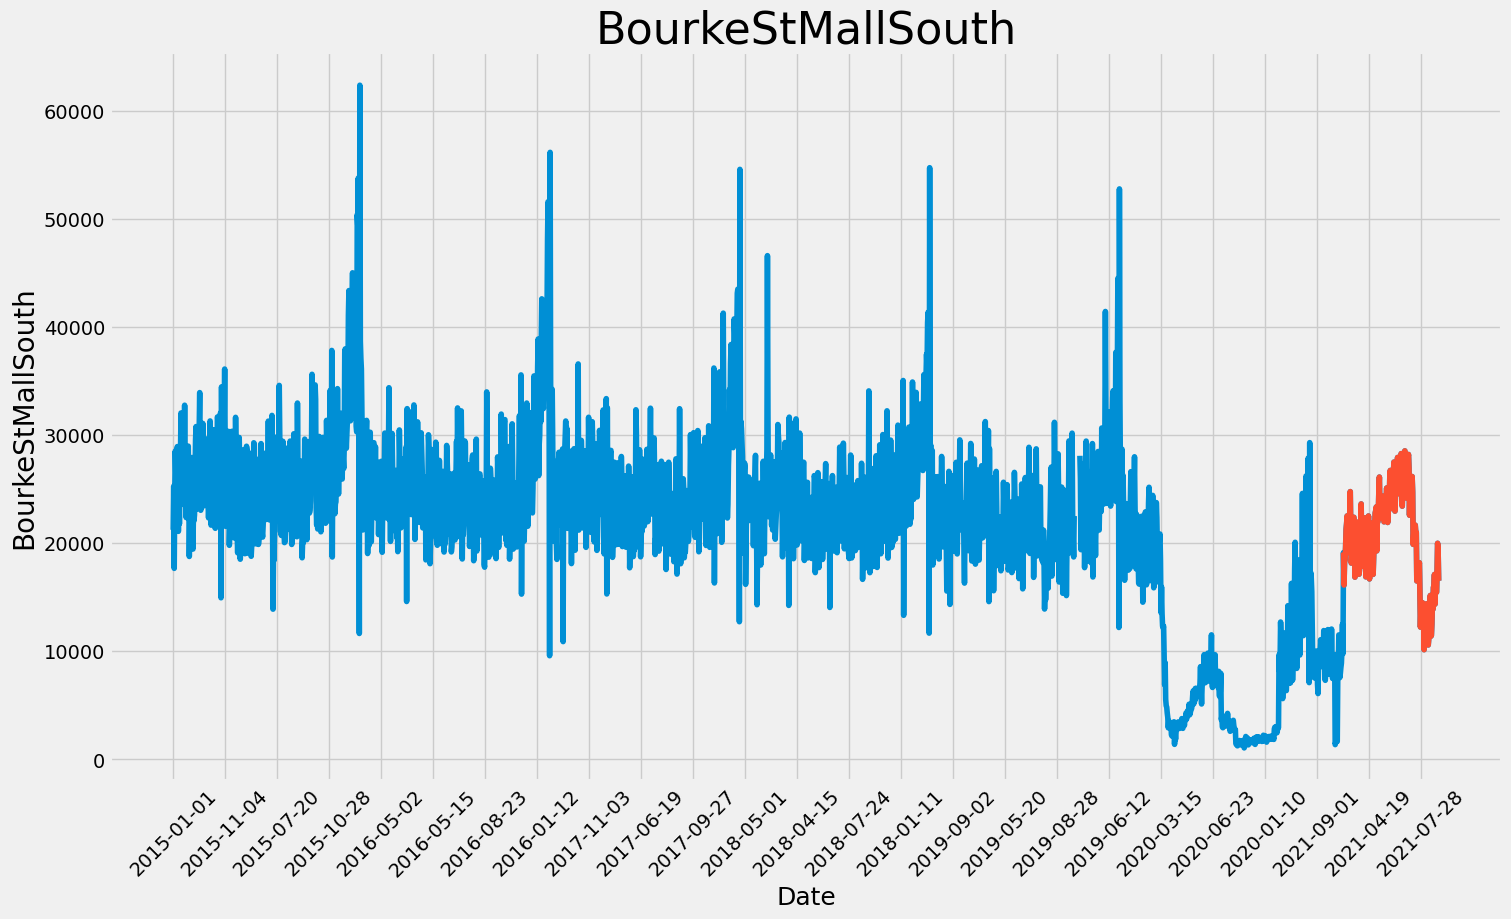

In [67]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16,9),dpi =100)

plt.plot(list(range(2435)),final_b['BourkeStMallSouth'])
plt.plot(list(range(2251,2435)),final_b['BourkeStMallSouth'][2251:]);

plt.xticks(range(0,2435,100),final_b['date'].loc[:2435:100],rotation=45);
plt.xlabel('Date',fontsize=18)
plt.ylabel('BourkeStMallSouth',fontsize=20)
plt.title('BourkeStMallSouth',fontsize =32)
plt.show()